In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [3]:
ipl = pd.read_csv("ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
df = ipl.drop(['mid', 'date', 'batsman', 'bowler', 'striker', 'non-striker'], axis = 1)

In [8]:
X = df.drop(['total'], axis = 1)
y = df['total']

In [10]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
X_train.dtypes

venue               int32
bat_team            int32
bowl_team           int32
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
dtype: object

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
model = keras.Sequential([
    keras.layers.Input(shape = (X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(216, activation = 'relu'),
    keras.layers.Dense(1, activation = 'linear')
])

huber_loss = tf.keras.losses.Huber(delta = 1.0)
model.compile(optimizer = 'adam', loss = huber_loss)

In [20]:
model.fit(X_train_scaled, y_train, epochs = 50, batch_size = 64, validation_data = (X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 52.6704 - val_loss: 14.9810
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 15.1047 - val_loss: 14.3465
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 14.8249 - val_loss: 14.2924
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 14.6306 - val_loss: 14.2670
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.6675 - val_loss: 14.3965
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.5983 - val_loss: 14.1899
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 14.6109 - val_loss: 14.3880
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 14.4887 - val_loss: 14.1904
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 14.6836 - val_loss: 14.2355
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14.5378 - val_loss: 14.2689
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14.4874 - val_loss: 14.2033
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

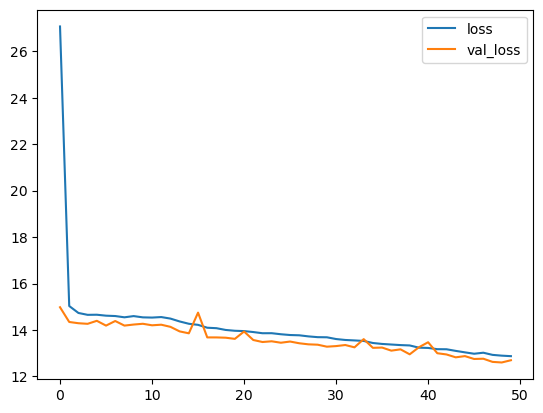

In [22]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [24]:
prediction = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test, prediction)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


13.18776574480876

In [26]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [30]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options = df['venue'].unique().tolist(), description = 'Venue:')
batting_team = widgets.Dropdown(options = df['bat_team'].unique().tolist(), description = 'Batting Team:')
bowling_team = widgets.Dropdown(options = df['bowl_team'].unique().tolist(), description = 'Bowling Team:')

predicted_button = widgets.Button(description = "Predict Score")
output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()
        venue_encoded = venue_encoder.transform([venue.value])
        bat_team_encoded = batting_team_encoder.transform([batting_team.value])
        bowl_team_encoded = bowling_team_encoder.transform([bowling_team.value])

        input_data = np.array([
            venue_encoded[0],
            bat_team_encoded[0],
            bowl_team_encoded[0]
        ]).reshape(1, -1)

        input_scaled = scaler.transform(input_data)
        predicted_score = model.predict(input_scaled)[0][0]
        print(f"Predicted Total Score: {int(predicted_score)}")

predicted_button.on_click(predict_score)

display(venue, batting_team, bowling_team, predicted_button, output)

Dropdown(description='Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali',…

Dropdown(description='Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Roya…

Dropdown(description='Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Darede…

Button(description='Predict Score', style=ButtonStyle())

Output()